# Wksht 7

In [1]:
import pandas as pd

In [2]:
examples = pd.read_fwf("data/predicate-matrix-continuous.txt", header=None).values
examples

array([[ -1.  ,  -1.  ,  -1.  , ...,   2.35,   9.7 ,   8.38],
       [ 39.25,   1.39,   0.  , ...,  58.64,  20.14,  11.39],
       [ 83.4 ,  64.79,   0.  , ...,  15.77,  13.41,  15.42],
       ..., 
       [ 63.57,  43.1 ,   0.  , ...,  35.95,  28.26,   5.  ],
       [ 55.31,  55.46,   0.  , ...,   5.04,  18.89,  72.99],
       [ 10.22,  21.53,  27.73, ...,   3.96,  14.05,  37.98]])

In [3]:
targets=pd.read_fwf("data/classes.txt", header=None)[1].values
targets

array(['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian',
       'persian+cat', 'horse', 'german+shepherd', 'blue+whale',
       'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard',
       'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla',
       'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel',
       'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua',
       'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer',
       'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus',
       'raccoon', 'cow', 'dolphin'], dtype=object)

In [4]:
from sklearn.cluster import KMeans

In [5]:
clf=KMeans(init='k-means++', n_clusters=10, n_init=10)
clf.fit(examples, targets)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [6]:
clf.cluster_centers_.shape

(10, 85)

In [7]:
clusters = clf.predict(examples)

In [8]:
groups={}
for i,animal in enumerate(targets):
    cluster = clusters[i]
    if cluster in groups:
        groups[cluster].append(animal)
    else:
        groups[cluster]=[]
groups

{0: ['zebra', 'giant+panda', 'cow'],
 1: ['seal', 'otter', 'walrus', 'dolphin'],
 2: ['gorilla', 'chimpanzee', 'bat'],
 3: ['persian+cat',
  'german+shepherd',
  'siamese+cat',
  'fox',
  'chihuahua',
  'weasel',
  'collie'],
 4: ['elephant', 'ox', 'rhinoceros', 'buffalo', 'pig'],
 5: ['polar+bear'],
 6: ['horse', 'moose', 'giraffe', 'deer'],
 7: ['humpback+whale'],
 8: ['skunk',
  'mole',
  'hamster',
  'squirrel',
  'rabbit',
  'rat',
  'mouse',
  'raccoon'],
 9: ['leopard', 'wolf', 'bobcat', 'lion']}

It is clear from the groups that the clustering makes sense

In [9]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from pylab import rcParams


In [10]:
z=linkage(examples, method='ward')

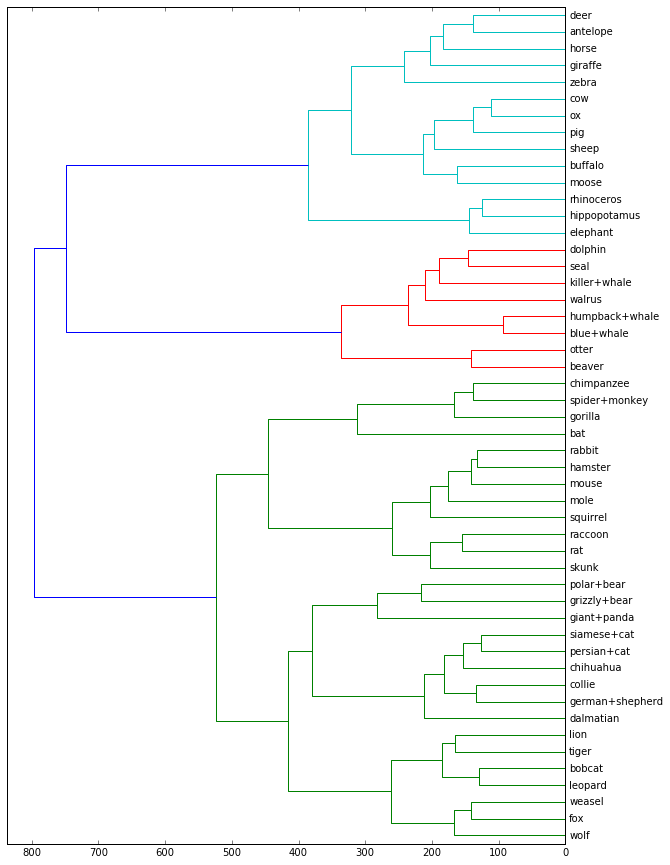

In [15]:

dendrogram(z, orientation="right", labels=targets)
rcParams['figure.figsize']=10,15

## Wksht 8

### 4

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
pca = PCA(n_components=None)
pca.fit(examples)

PCA(copy=True, n_components=None, whiten=False)

In [100]:
pca.components_.shape

(50, 85)

In [101]:
pca.explained_variance_.shape

(50,)

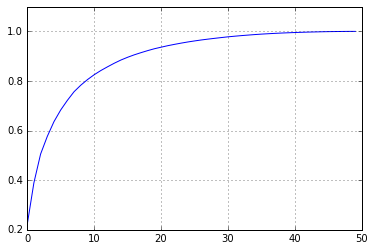

In [95]:
cumulative_explained = np.cumsum(pca.explained_variance_ratio_) 
plt.plot(cumulative_explained);
plt.grid()

In [99]:
print pca.explained_variance_ratio_.shape

(50,)


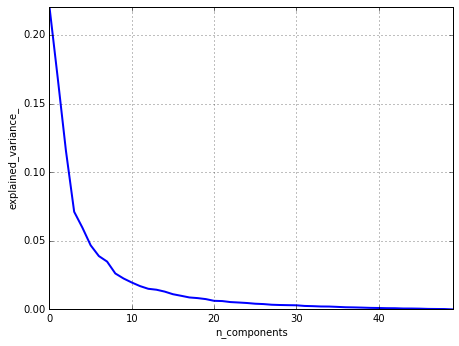

In [97]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.grid()

In [119]:
pca.explained_variance_ratio_[:2].sum()

0.16800588418808399

the first 2 eigen vectors hold 16% of the variance. Let's choose the first 2 vectors for our PCA reduction:

In [120]:
pca.explained_variance_ratio_[2:].sum()

0.79844146351296852

The rest of the vectors hold almost 80% of the data, so this PCA seems risky

In [149]:
pca.n_components = 2
features_train_reduced = pca.fit_transform(examples)
features_train_reduced = np.array(features_train_reduced)
print features_train_reduced.shape
features_train_reduced

(50, 2)


array([[  14.33200256,  106.35992505],
       [ -58.9630861 ,  -76.22681969],
       [ 170.08767172, -139.3662367 ],
       [  31.85582565,  -54.04638157],
       [ -29.65753503,  -11.3917049 ],
       [ -40.87859041,  -10.72272289],
       [   1.17791115,  104.79228138],
       [ -82.43016284,  -45.38757524],
       [ 211.92608739,  -82.83737143],
       [ -90.92835147,  -43.3052917 ],
       [ -58.01597662,   35.20297112],
       [ -33.18440666,   20.17533047],
       [-127.19955243,  -92.38136512],
       [ 129.48931695,   24.05695316],
       [-117.35250987,  -89.2965802 ],
       [  28.55636713,  129.17123958],
       [ -43.49964663,    6.27693742],
       [ 226.54893728,  -95.28906181],
       [  95.64111855,   85.05034027],
       [ -18.3316707 ,    1.34492612],
       [  56.58550468,  120.70785352],
       [-111.97091878,  -74.12827031],
       [  25.79398483,  132.31759287],
       [ 151.36316459, -100.93057781],
       [ -67.92677834,   19.55128584],
       [ -48.25033667,   

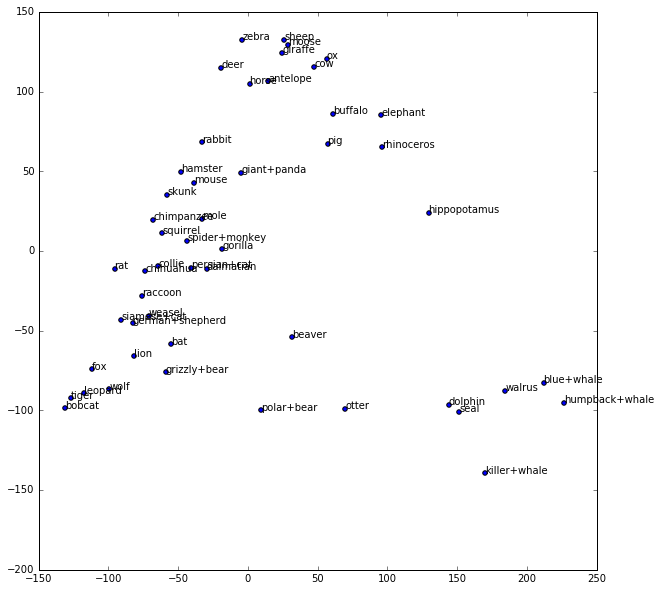

In [128]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)
for i,point in enumerate(features_train_reduced):
    ax.annotate(targets[i], xy=point, xytext=point)
    
plt.scatter(features_train_reduced[:,0], features_train_reduced[:,1])

The clustering clearly makes sense.

### 5

In [3]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
import sys
import os

def loadmnist(imagefile, labelfile):
    if os.path.isfile(imagefile+'.npy'):
        x = np.load(imagefile + '.npy')
        y = np.load(labelfile + '.npy')
        return (x,y)

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    
    np.save(imagefile + '.npy', x)
    np.save(labelfile + '.npy', y)
    
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
#     plt.show()

In [4]:
def err(evals_shifted, evals):
    return evals_shifted / evals

In [5]:
X_train, Y_train = loadmnist('../gaussian_classifier/data/train-images-idx3-ubyte', 
'../gaussian_classifier/data/train-labels-idx1-ubyte')
X_test, Y_test = loadmnist('../gaussian_classifier/data/t10k-images-idx3-ubyte', 
'../gaussian_classifier/data/t10k-labels-idx1-ubyte')

In [6]:
X_train.shape

(60000, 784)

In [66]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

In [186]:
original_vectors = pca.components_
original_vectors.shape

(784, 784)

In [188]:
orig_evals = np.linalg.norm(original_vectors, axis=1)
orig_evals.shape

(784,)

These are my original 784 eigen vectors modeling the data

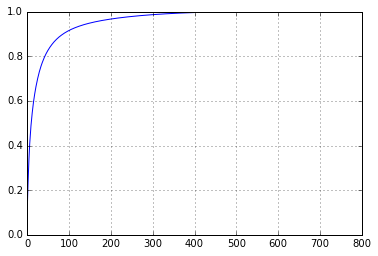

In [189]:
cumulative_explained = np.cumsum(pca.explained_variance_ratio_) 
plt.plot(cumulative_explained);
plt.grid()

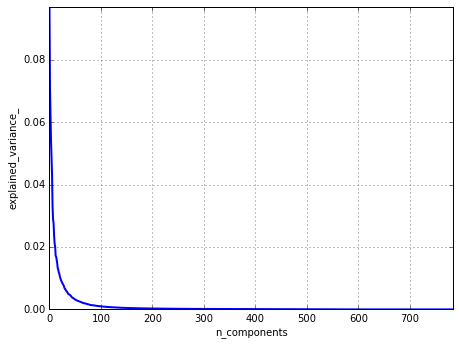

In [190]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.grid()

It should be clear from the example above, that we can easy cut out vecotrs >100 w/o loosing any data

In [9]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

In [14]:
pca.explained_variance_.sum()

3428445.4330706215

In [19]:
cov=np.cov(X_train.T)
evals, evecs = np.linalg.eig(cov)
evals = np.float64(evals)
evecs = np.float64(evecs)
total_variation = np.sum(evals)
total_variation

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


3428502.5747802099

In [22]:
denominator = total_variation

def F(k):
    numerator = np.sum(evals[k+1::])
    return numerator/denominator

In [25]:
k_list = [200, 150, 100, 50, 25]
for k in k_list:
    print str(k)+':\t',F(k)

200:	0.0332706860428
150:	0.0511769822288
100:	0.084387410268
50:	0.17216296616
25:	0.299801899793


### b

In [47]:
def transform(k, image, image_id):
    U = evecs[:,:k+1]
    UUT = np.dot(U,U.T)
    image = image.T
    X = np.dot(UUT,image).T[image_id]
    X = X.reshape(28,28)
    return X

In [56]:
def printdigit(X,k):
    plt.imshow(X, cmap=plt.cm.gray) 
    plt.title('%i' % k, fontsize = 20)
    plt.axis('off')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


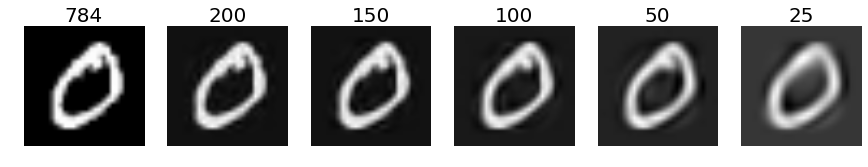

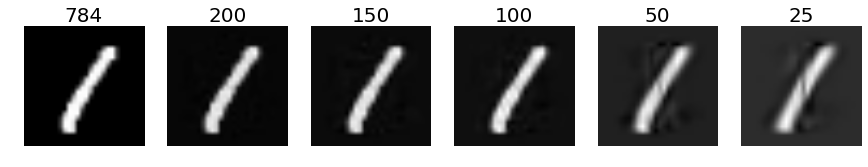

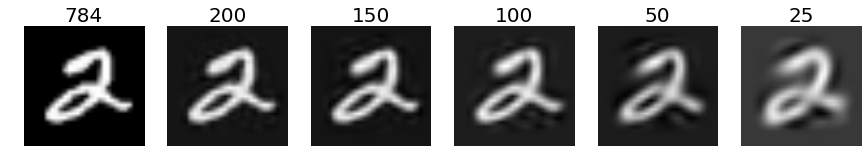

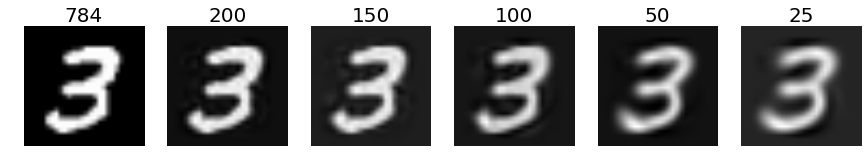

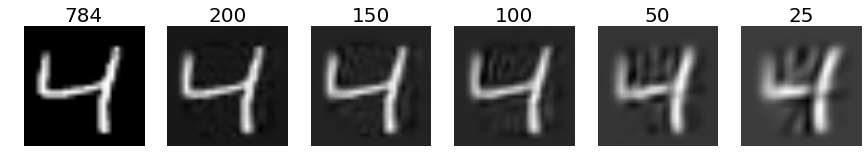

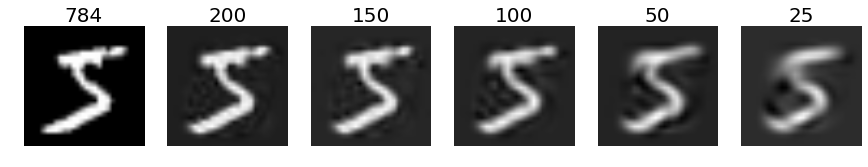

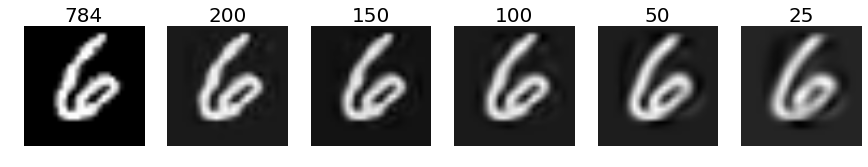

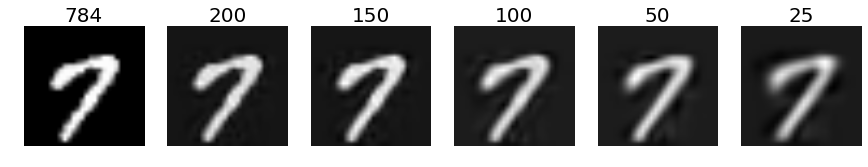

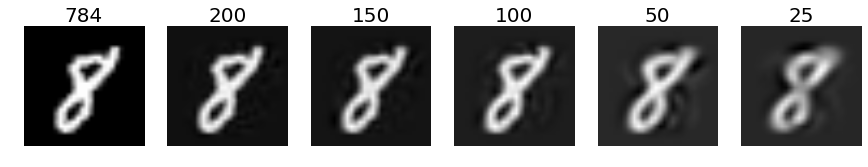

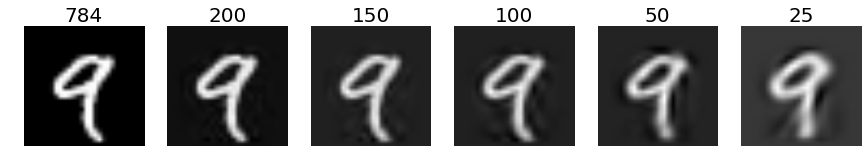

In [65]:
#get PCA for each class
targets = list(set(Y_train))
table={}
for target in targets:
    #print "Class %s"%(target)
    x_train=[]
    y_train=[]
    table[target]={}
    
    for i, example in enumerate(X_train):
        if Y_train[i]==target:
            x_train.append(example)
            y_train.append(target)
    #now get principle components
    x_train = np.array(x_train)
    cov = np.cov(x_train.T)
    evals, evecs = np.linalg.eig(cov)
    evals = np.float64(evals)#get out of imaginary
    evecs = np.float64(evecs)#get out of imaginary
    denominator = evals.sum()
    
    
    k_list = [784, 200, 150, 100, 50, 25]
    index = 0
    plt.figure(figsize=(15,5))
    for k in k_list:
        #print str(k)+':\t',F(k)
        table[target][k]=F(k)
        image_reduced = transform(k, x_train[:10], 0)
        index += 1
        plt.subplot(1, len(k_list), index)
        printdigit(image_reduced, k)

In [61]:
import pandas as pd

In [62]:
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9
25,0.201817,0.127616,0.276346,0.268917,0.246501,0.256309,0.216404,0.216041,0.291628,0.218670
50,0.117534,0.071592,0.158965,0.156145,0.145469,0.147014,0.120032,0.126723,0.164755,0.121179
100,0.058764,0.030518,0.077597,0.075243,0.072825,0.070057,0.057224,0.062837,0.076202,0.056898
150,0.034136,0.014634,0.045578,0.043147,0.042209,0.039591,0.032374,0.035918,0.042682,0.030738
200,0.020744,0.006587,0.028082,0.025973,0.025398,0.023631,0.018940,0.021233,0.024901,0.016958
784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
